# MANOVA example dataset


https://www.statsmodels.org/dev/generated/statsmodels.multivariate.manova.MANOVA.html

Suppose we have a dataset of various plant varieties (plant_var) and their associated phenotypic measurements for plant heights (height) and canopy volume (canopy_vol). We want to see if plant heights and canopy volume are associated with different plant varieties using MANOVA.

### Load dataset

In [1]:
import pandas as pd
df=pd.read_csv("https://reneshbedre.github.io/assets/posts/ancova/manova_data.csv")
df.head(5)

,plant_var,height,canopy_vol
0,A,20.0,0.70
1,A,22.0,0.80
2,A,24.0,0.95
3,A,18.0,0.60
4,A,20.0,0.74


### Summary statistics and visualization of dataset

Get summary statistics based on each dependent variable

In [2]:
[df.groupby("plant_var")["height"].mean(),df.groupby("plant_var")["height"].count(),df.groupby("plant_var")["height"].std()]

[plant_var
 A    18.90
 B    16.54
 C     3.05
 D     9.35
 Name: height, dtype: float64,
 plant_var
 A    10
 B    10
 C    10
 D    10
 Name: height, dtype: int64,
 plant_var
 A    2.923088
 B    1.920185
 C    1.039498
 D    2.106735
 Name: height, dtype: float64]

In [3]:
[df.groupby("plant_var")["canopy_vol"].mean(),df.groupby("plant_var")["canopy_vol"].count(),df.groupby("plant_var")["canopy_vol"].std()]

[plant_var
 A    0.784
 B    0.608
 C    0.272
 D    0.474
 Name: canopy_vol, dtype: float64,
 plant_var
 A    10
 B    10
 C    10
 D    10
 Name: canopy_vol, dtype: int64,
 plant_var
 A    0.121308
 B    0.096816
 C    0.143279
 D    0.094540
 Name: canopy_vol, dtype: float64]

### Visualize dataset

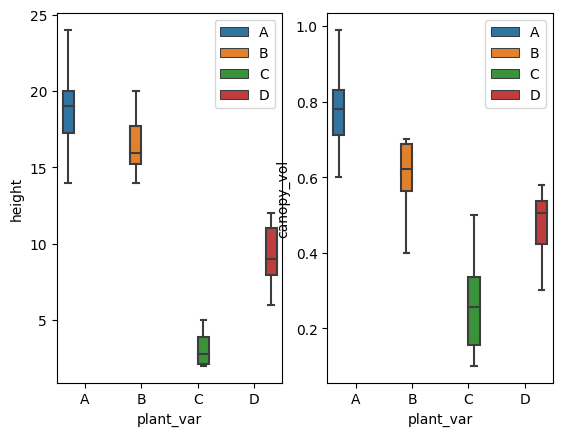

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=2)
sns.boxplot(data=df, x="plant_var", y="height", hue=df.plant_var.tolist(), ax=axs[0])
sns.boxplot(data=df, x="plant_var", y="canopy_vol", hue=df.plant_var.tolist(), ax=axs[1])
plt.show()

### Perform one-way MANOVA

In [5]:
from statsmodels.multivariate.manova import MANOVA
fit = MANOVA.from_formula('height + canopy_vol ~ plant_var', data=df)
print(fit.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept         Value  Num DF  Den DF F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda  0.0374 2.0000 35.0000 450.0766 0.0000
         Pillai's trace  0.9626 2.0000 35.0000 450.0766 0.0000
 Hotelling-Lawley trace 25.7187 2.0000 35.0000 450.0766 0.0000
    Roy's greatest root 25.7187 2.0000 35.0000 450.0766 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
       plant_var         Value  Num DF  Den DF F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda  0.0797 6.0000 70.0000  29.6513 0.0000
         Pillai's trace  1.0365 6.0000 72.0000  12.9093 0.0000
 Hotelling-

### Make a Conclusion

The Pillai’s Trace test statistics is statistically significant [Pillai’s Trace = 1.03, F(6, 72) = 12.90, p < 0.001] and indicates that plant varieties has a statistically significant association with both combined plant height and canopy volume.

## Your Task 1

Suppose we have gathered the following data on female athletes in three sports. The
measurements we have made are the athletes' heights and vertical jumps, both in inches. The
data are listed as (height, jump) as follows:
Basketball Players:
Track Athletes:
Softball Players:
(66, 27), (65, 29), (68, 26), (64, 29), (67, 29)
(63, 23), (61, 26), (62, 23), (60, 26)
(62, 23), (65, 21), (63, 21), (62, 23), (63.5, 22), (66, 21.5)

Use statsmodels.multivariate.manova Python to conduct the MANOVA F-test using Wilks' Lambda to test for a difference in
(height, jump) mean vectors across the three sports. Make sure you include clear command
lines and relevant output/results with hypotheses, test result(s) and
conclusion(s)/interpretation(s)

In [6]:
# YOUR CODE here
# Define your dataframe

data = {"sports": ["Basketball", "Basketball", "Basketball", "Basketball", "Basketball", "Track", "Track", "Track", "Track", "Softball", "Softball", "Softball", "Softball", "Softball", "Softball"],
                    "height" : [66, 65, 68, 64, 67, 63, 61, 62, 60, 62, 65, 63, 62, 63.5, 66],
                    "jump": [27, 29, 26, 29, 29, 23, 26, 23, 26, 23, 21, 21, 23, 22, 21.5]}

players = pd.DataFrame(data)
players

,sports,height,jump
0,Basketball,66.0,27.0
1,Basketball,65.0,29.0
2,Basketball,68.0,26.0
3,Basketball,64.0,29.0
4,Basketball,67.0,29.0
5,Track,63.0,23.0
6,Track,61.0,26.0
7,Track,62.0,23.0
8,Track,60.0,26.0
9,Softball,62.0,23.0


In [7]:
# Check data

# get summary
print("Summary Statistics (Counts, Mean, Standard Deviation) for 'height' grouped by sports")
print([players.groupby("sports")["height"].count(), players.groupby("sports")["height"].mean(), players.groupby("sports")["height"].std()])
print("\nSummary Statistics (Counts, Mean, Standard Deviation) for 'jump' grouped by sports")
print([players.groupby("sports")["jump"].count(), players.groupby("sports")["jump"].mean(), players.groupby("sports")["jump"].std()])

Summary Statistics (Counts, Mean, Standard Deviation) for 'height' grouped by sports
[sports
Basketball    5
Softball      6
Track         4
Name: height, dtype: int64, sports
Basketball    66.000000
Softball      63.583333
Track         61.500000
Name: height, dtype: float64, sports
Basketball    1.581139
Softball      1.625320
Track         1.290994
Name: height, dtype: float64]

Summary Statistics (Counts, Mean, Standard Deviation) for 'jump' grouped by sports
[sports
Basketball    5
Softball      6
Track         4
Name: jump, dtype: int64, sports
Basketball    28.000000
Softball      21.916667
Track         24.500000
Name: jump, dtype: float64, sports
Basketball    1.414214
Softball      0.917424
Track         1.732051
Name: jump, dtype: float64]


### Visualize dataset

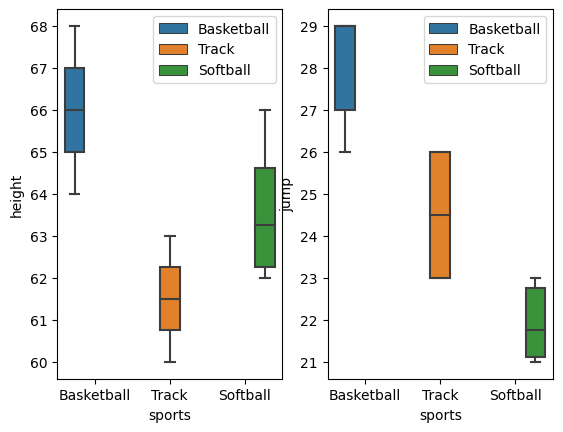

In [97]:
fig, axs = plt.subplots(ncols=2)
sns.boxplot(data=players, x="sports", y="height", hue=players.sports.tolist(), ax=axs[0])
sns.boxplot(data=players, x="sports", y="jump", hue=players.sports.tolist(), ax=axs[1])
plt.show()

MANOVA F-test using Wilks' Lambda to test for a difference in (height, jump) mean vectors across the three sports.

HO : all means are equal \
Ha : not all means are equal

In [8]:
# fit the data using MANOVA
test = MANOVA.from_formula('height + jump ~ sports', data = players)
print(test.mv_test())

                    Multivariate linear model
                                                                  
------------------------------------------------------------------
       Intercept          Value   Num DF  Den DF  F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda    0.0003 2.0000 11.0000 16211.0812 0.0000
         Pillai's trace    0.9997 2.0000 11.0000 16211.0812 0.0000
 Hotelling-Lawley trace 2947.4693 2.0000 11.0000 16211.0812 0.0000
    Roy's greatest root 2947.4693 2.0000 11.0000 16211.0812 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
             sports          Value  Num DF  Den DF F Value  Pr > F
------------------------------------------------------------------
              Wilks' lambda  0.0359 4.0000 22.0000  23.5362 0.0000
             Pil

### Make a Conclusion

The Wilks' Lambda test result shows a statistically significant multivariate effect of female athletes [Wilks' lambda = 0.0359, F(4, 22) = 23.54, p < 0.000], indicating that athletes' heights and vertical jumps differ based on the type of sports they play.

## Your Task 2 (bonus and optional)

For the above problem, try to use non-built-in function in Python to calculate F score and check with your built-in function output above

In [89]:
# YOUR CODE HERE
import numpy as np

# convert dataframe to np array
array = players.to_numpy()

# split data into groups
basketball = np.delete(array[:5], [0], axis = 1)
track = np.delete(array[5:9], [0], axis = 1)
softball = np.delete(array[9:], [0], axis = 1)

# calculate each group and all means
basketball_mean = basketball.mean(axis=0)
track_mean = track.mean(axis=0)
softball_mean = softball.mean(axis=0)
all_mean = (basketball_mean + track_mean + softball_mean) / 3

# differences
basketball_diff = np.array([basketball_mean - all_mean], dtype='float64')
track_diff = np.array([track_mean - all_mean], dtype='float64')
softball_diff = np.array([softball_mean - all_mean], dtype='float64')

# calculate SSH
SSH = 3*((basketball_diff.transpose().dot(basketball_diff)) + (track_diff.transpose().dot(track_diff)) + (softball_diff.transpose().dot(softball_diff)))
print(SSH)

# calculate SSE

def within_matrix(matrix):
    result = 0
    for i in range(len(matrix)):
        diff = np.array([matrix[i] - matrix.mean(axis = 0)], dtype='float64')
        result += diff.transpose().dot(diff)
    return result

SSE = within_matrix(basketball) + within_matrix(track) + within_matrix(softball)
print(SSE)


[[30.43055556 25.06944444]
 [25.06944444 55.93055556]]
[[ 28.20833333 -17.20833333]
 [-17.20833333  21.20833333]]


In [94]:
# perform Wilks' Test
np.linalg.det(SSE) / np.linalg.det(SSE + SSH)

0.06771762376607485

### Make a Conclusion

The manually calculated Wilks' Lambda test statistic is not same as the one calculated using 'statsmodels.multivariate.manova' MANOVA F-test. However, I would say that there is significant evidence to reject the null hypothesis since the manually claculated statistic is very close to 0. The value close to 0 indicates that there is little variance left unexplained by the independent variable, supporting rejection of the null hypothesis. 

In [1]:
!jupyter nbconvert --to html MANOVA_Assignment.ipynb

[NbConvertApp] Converting notebook MANOVA_Assignment.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 372900 bytes to MANOVA_Assignment.html
